<a href="https://colab.research.google.com/github/Abhishek0716ss/AIML2025/blob/main/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('diabetes.csv')  # Use correct path or upload on Colab


In [3]:
df.isnull().sum()  # Check for missing values
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target (0 or 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [6]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.7467532467532467
[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



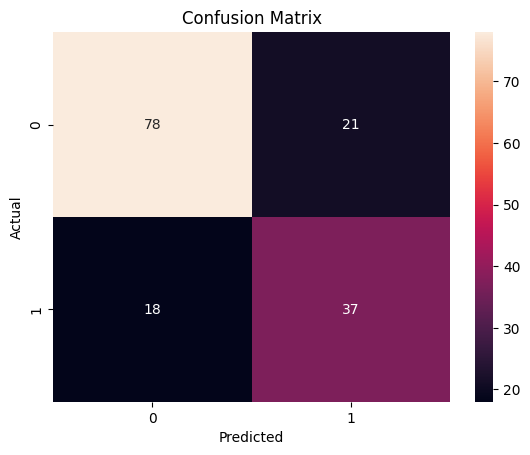

In [7]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)


Predictions: [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


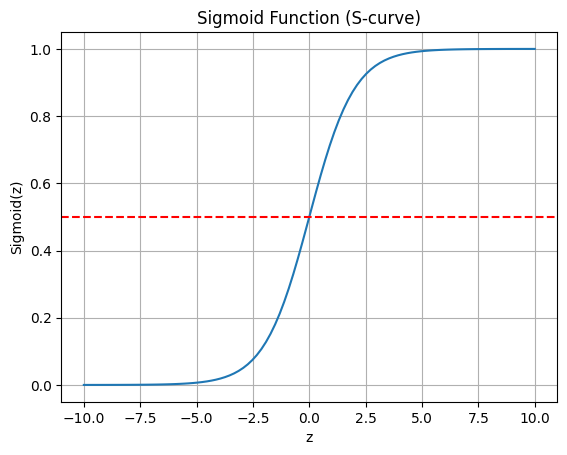

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Values from -10 to 10
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

# Plot the sigmoid curve
plt.plot(z, sig)
plt.title('Sigmoid Function (S-curve)')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='--')  # Threshold line
plt.show()


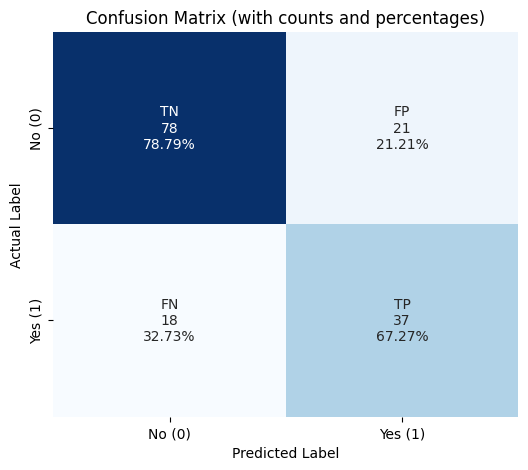

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict and get confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Calculate percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Label strings with counts and percentages
labels = np.array([["TN\n{0}\n{1:.2%}".format(cm[0,0], cm_percent[0,0]),
                    "FP\n{0}\n{1:.2%}".format(cm[0,1], cm_percent[0,1])],
                   ["FN\n{0}\n{1:.2%}".format(cm[1,0], cm_percent[1,0]),
                    "TP\n{0}\n{1:.2%}".format(cm[1,1], cm_percent[1,1])]])

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (with counts and percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks([0.5, 1.5], ['No (0)', 'Yes (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Yes (1)'])
plt.show()
